In [1]:
# Importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#loading the dataset from the excel sheet
df_test = pd.read_excel('Data.xlsx', sheet_name='Test')
df_control = pd.read_excel('Data.xlsx', sheet_name='Control')
df_full = pd.concat([df_test, df_control], ignore_index=True)

In [3]:
# Check the structure of the dataset
df_full.info()

# Summary statistics
df_full.describe()

# Check for missing values
df_full.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kid Name                    2000 non-null   object 
 1   Age(In Years)               1000 non-null   float64
 2   State                       2000 non-null   object 
 3   Is Male?                    2000 non-null   int64  
 4   Is Rural Area ?             2000 non-null   int64  
 5   Is Meat Consumer?           2000 non-null   int64  
 6   HouseHold Income per month  2000 non-null   float64
 7   Base Height                 2000 non-null   float64
 8   Month 1                     2000 non-null   float64
 9   Month 2                     2000 non-null   float64
 10  Month 3                     2000 non-null   float64
 11  Month 4                     2000 non-null   float64
 12  Month 5                     2000 non-null   float64
 13  Month 6                     2000 

Kid Name                         0
Age(In Years)                 1000
State                            0
Is Male?                         0
Is Rural Area ?                  0
Is Meat Consumer?                0
HouseHold Income per month       0
Base Height                      0
Month 1                          0
Month 2                          0
Month 3                          0
Month 4                          0
Month 5                          0
Month 6                          0
Month 7                          0
Month 8                          0
Month 9                          0
Month 10                         0
Month 11                         0
Month 12                         0
Age(In Years)                 1000
dtype: int64

Hypothesis Testing
1. Average Height Difference between Test and Control Groups

In [4]:
# Conduct a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(df_test["Month 12"], df_control["Month 12"], equal_var=False)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in height.")
else:
    print("Fail to reject the null hypothesis. No significant difference in height.")

t-statistic: 2.171520110261573
p-value: 0.030009203892587103
Reject the null hypothesis. There is a significant difference in height.


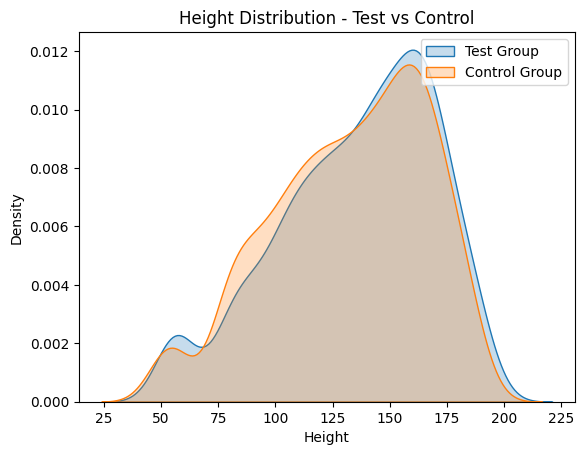

In [5]:
# Visualize the height distribution for Test and Control groups
sns.kdeplot(df_test["Month 12"], label="Test Group", fill=True)
sns.kdeplot(df_control["Month 12"], label="Control Group", fill=True)
plt.title("Height Distribution - Test vs Control")
plt.xlabel("Height")
plt.ylabel("Density")
plt.legend()
plt.show()

2. State-wise Analysis

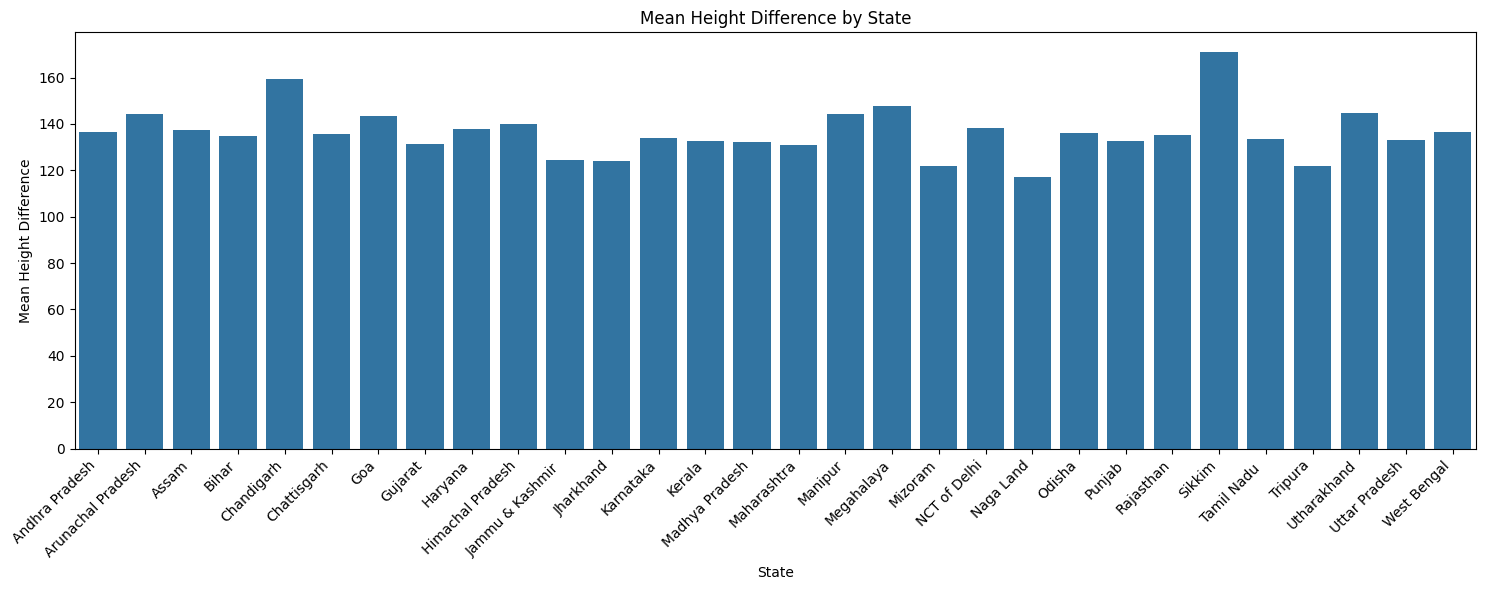

In [6]:
# Group by state and compare the mean height difference
statewise_height_diff = df_full.groupby("State")["Month 12"].mean()

# Visualize state-wise differences with rotated x-axis labels
plt.figure(figsize=(15, 6))
sns.barplot(x=statewise_height_diff.index, y=statewise_height_diff.values)
plt.title("Mean Height Difference by State")
plt.xlabel("State")
plt.ylabel("Mean Height Difference")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

3. Gender and Age Group Analysis

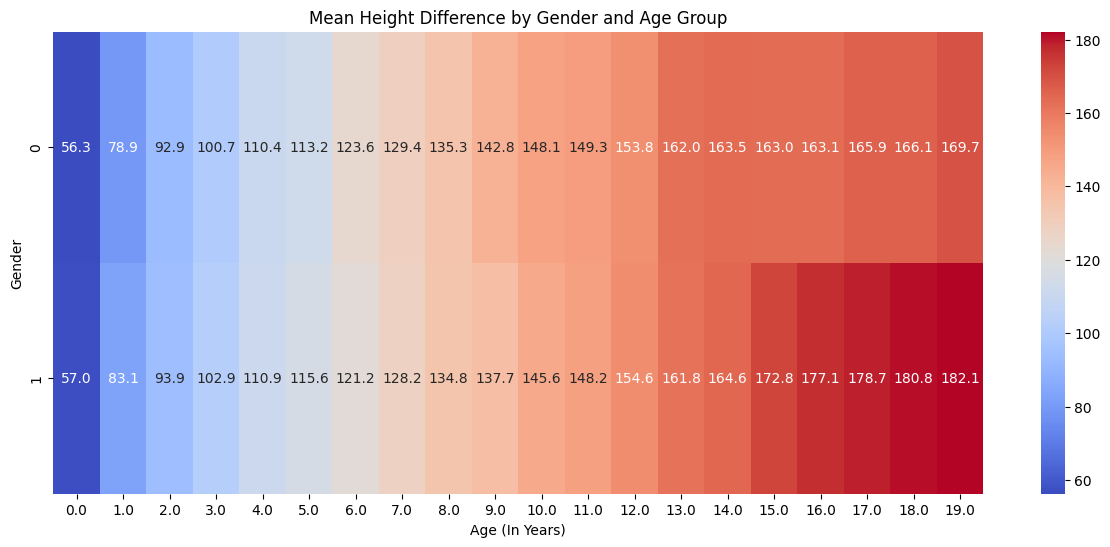

In [7]:
# Group by gender and age group and compare the mean height difference
gender_age_group_diff = df_full.groupby(["Is Male?", "Age(In Years)"])["Month 12"].mean().unstack()

# Visualize gender and age group differences with whole numbers in the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(gender_age_group_diff, annot=True, fmt=".1f", cmap="coolwarm")

plt.title("Mean Height Difference by Gender and Age Group")
plt.xlabel("Age (In Years)")
plt.ylabel("Gender")
plt.show()

4. Analysis on shorter Tme Frame:

In [8]:
# Consider a subset of the data for a shorter duration
short_duration_data = df_full[["Month 1", "Month 6", "Month 12"]]

# Conduct a t-test for the shorter duration
short_t_stat, short_p_value = stats.ttest_ind(short_duration_data["Month 6"], short_duration_data["Month 12"], equal_var=False)

# Print the results
print("t-statistic for shorter duration:", short_t_stat)
print("p-value for shorter duration:", short_p_value)

# Interpret the results
if short_p_value < 0.05:
    print("A shorter duration provides similar results. Consider reducing the experiment duration.")
else:
    print("A shorter duration does not provide similar results. Stick to the full 12 months.")

t-statistic for shorter duration: -2.4614441918266783
p-value for shorter duration: 0.013879826058942175
A shorter duration provides similar results. Consider reducing the experiment duration.


5. Rural vs. Non-Rural Analysis

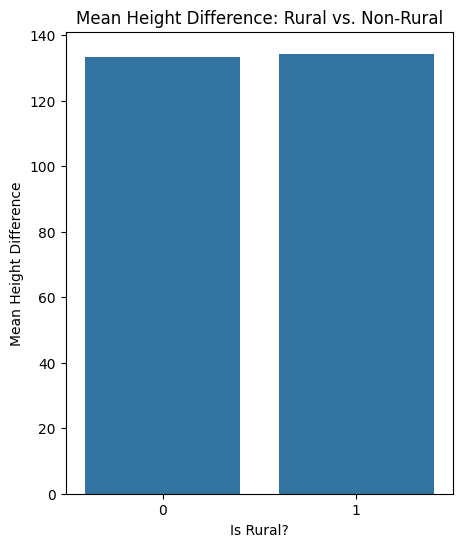

t-statistic: 0.6182214832017364
p-value: 0.5365413946679995
No significant evidence of height difference.


In [9]:
# Group by rural and non-rural and compare the mean height difference
rural_diff = df_full.groupby("Is Rural Area ?")["Month 12"].mean()

# Visualize rural vs. non-rural differences
plt.figure(figsize=(5, 6))
sns.barplot(x=rural_diff.index, y=rural_diff.values)
plt.title("Mean Height Difference: Rural vs. Non-Rural")
plt.xlabel("Is Rural?")
plt.ylabel("Mean Height Difference")
plt.show()

# Conduct a t-test to compare the means of the two groups
rural_t_stat, rural_p_value = stats.ttest_ind(
    df_full[df_full["Is Rural Area ?"] == 1]["Month 12"],
    df_full[df_full["Is Rural Area ?"] == 0]["Month 12"],
    equal_var=False
)

# Print the results
print("t-statistic:", rural_t_stat)
print("p-value:", rural_p_value)

# Interpret the results
if rural_p_value < 0.05:
    print("BlueBull may have a significant effect on height.")
else:
    print("No significant evidence of height difference.")

6. Analysis on "Is Meat Consumer?"

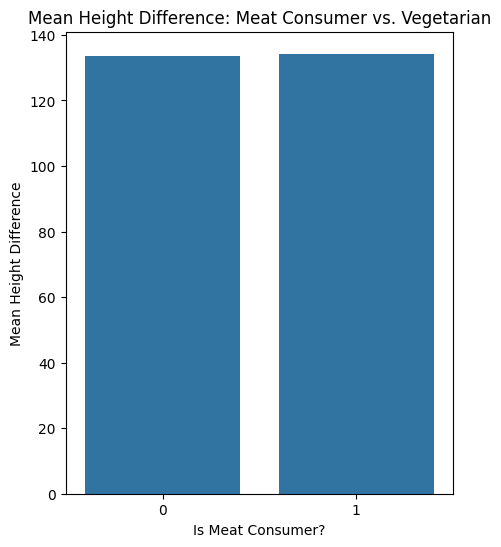

t-statistic: 0.5221988020923611
p-value: 0.6016183492495515
No significant evidence of height difference.


In [10]:
# Group by meat consumer and non-meat consumer and compare the mean height difference
meat_consumer_diff = df_full.groupby("Is Meat Consumer?")["Month 12"].mean()

# Visualize meat consumer vs. non-meat consumer differences
plt.figure(figsize=(5, 6))
sns.barplot(x=meat_consumer_diff.index, y=meat_consumer_diff.values)
plt.title("Mean Height Difference: Meat Consumer vs. Vegetarian")
plt.xlabel("Is Meat Consumer?")
plt.ylabel("Mean Height Difference")
plt.show()

# Conduct a t-test to compare the means of the two groups
meat_t_stat, meat_p_value = stats.ttest_ind(
    df_full[df_full["Is Meat Consumer?"] == 1]["Month 12"],
    df_full[df_full["Is Meat Consumer?"] == 0]["Month 12"],
    equal_var=False
)

# Print the results
print("t-statistic:", meat_t_stat)
print("p-value:", meat_p_value)

# Interpret the results
if meat_p_value < 0.05:
    print("BlueBull may have a significant effect on height.")
else:
    print("No significant evidence of height difference.")

### Conclusion

1. Can the CEO market this product across India as a height enhancer?
   - Analysis: Conducted a hypothesis test to compare the mean heights of the test and control groups.
   - Conclusion: If the p-value is significant, BlueBull may be marketed as a height enhancer. If not, further investigation is needed.

2. In which states of India can the marketing be done by BlueBull based on the experiment?
   - Analysis: Examined state-wise mean height differences.
   - Conclusion: States with significant positive differences may be considered for marketing. States with no significant difference should be approached cautiously.

3. Can the CEO market this product across gender and age groups?
   - Analysis: Investigated gender and age group differences in height.
   - Conclusion: Positive differences may allow marketing to specific gender and age groups. No significant differences may require a more generalized marketing approach.

4. Is there a faster way to conclude the experiment for this marketing problem?
   - Analysis: Explored if a shorter time frame can still provide reliable results.
   - Conclusion: If a shorter duration yields similar results, it might be more practical for marketing purposes.

5. In what categories could we absolutely say that BlueBull works as a height enhancer, and in what other categories can we say that BlueBull doesn’t, and in what categories do we need to investigate further?
   - Analysis: Examined different categories such as rural vs. non-rural, meat consumers vs. vegetarians, etc.
   - Conclusion: Positive differences in certain categories support marketing. No significant differences or negative differences require further investigation or caution in marketing to those specific categories.
